In [1]:
import copy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import matplotlib.colors as mcolors
palette = list(mcolors.TABLEAU_COLORS.keys())
%matplotlib inline

In [2]:
#sns.set_theme(style="ticks", palette="pastel")
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")

In [3]:
data_file = 'plotting_data.xlsx'
df = pd.read_excel(data_file)
# df = df.sort_values(by=['Rescue', 'Conc'], ascending=[False, True]).reset_index(drop=True)

In [4]:
df

,Cell_line,Media,Rotenone,Rescue,Replicate,Prlfr,CellVol_mean,CellVol_median
0,H1299,Ser,30 nM,Vec,1,0.431422,12216,10212
1,H1299,Ser,30 nM,Vec,2,0.386923,12976,11085
2,H1299,Ser,30 nM,Vec,3,0.367330,13312,11420
3,H1299,Ser,30 nM,Uri,1,0.456926,11432,9739
4,H1299,Ser,30 nM,Uri,2,0.440602,11566,9785
5,H1299,Ser,30 nM,Uri,3,0.436904,12254,10578
6,H1299,Ser,30 nM,Asn,1,0.549366,9967,8538
7,H1299,Ser,30 nM,Asn,2,0.533435,10061,8684
8,H1299,Ser,30 nM,Asn,3,0.505332,10589,8990
9,H1299,Ser,30 nM,Hpx,1,0.553919,9609,8050


/Users/krdav/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


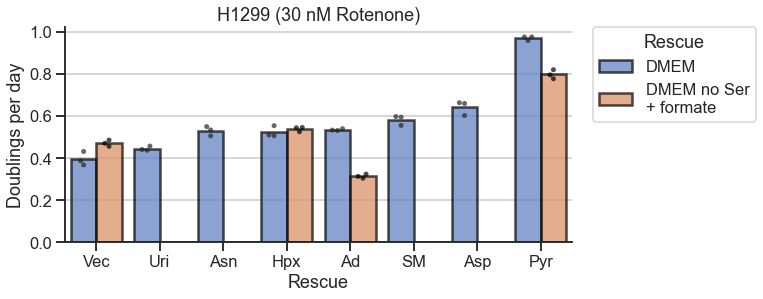

In [5]:
# Plot all data:
fig, ax1 = plt.subplots(1, 1, figsize=(11, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df, edgecolor='black', linewidth=2.5, alpha=0.7, errorbar=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df, alpha=0.7, dodge=True, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
handles, labels = g1.get_legend_handles_labels()
labels = ['DMEM', 'DMEM no Ser\n+ formate']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles[2:4])
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (30 nM Rotenone)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('all_data.pdf', bbox_inches='tight')

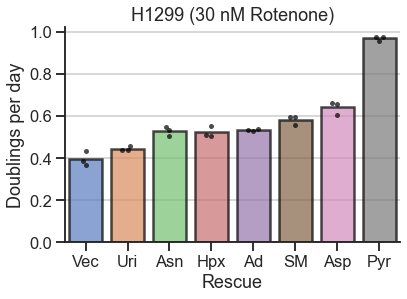

In [6]:
# Plot only normal DMEM media data:
mask = df['Media'] == 'Ser'

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', data=df[mask], edgecolor='black', linewidth=2.5, alpha=0.7, errorbar=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', data=df[mask], alpha=0.7, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (30 nM Rotenone)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('DMEM_data.pdf', bbox_inches='tight')


/Users/krdav/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


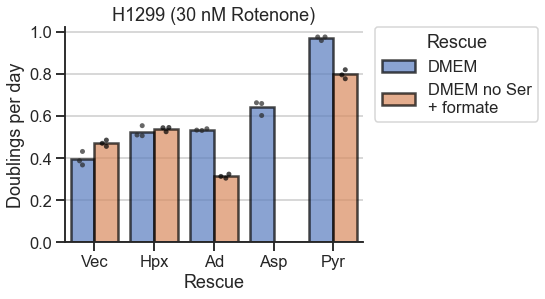

In [7]:
# Plot all data:

comp_list = ['Vec', 'Hpx', 'Ad', 'Asp', 'Pyr']
mask = df['Rescue'].isin(comp_list)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.barplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df[mask], edgecolor='black', linewidth=2.5, alpha=0.7, errorbar=None)
g1 = sns.swarmplot(ax=ax1, y='Prlfr', x='Rescue', hue='Media', data=df[mask], alpha=0.7, dodge=True, color='black')
g1.set_ylabel('Doublings per day');
g1.set_xlabel('Rescue');
handles, labels = g1.get_legend_handles_labels()
labels = ['DMEM', 'DMEM no Ser\n+ formate']
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Rescue', labels=labels, handles=handles[2:4])
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (30 nM Rotenone)')
ax1.axhline(y=0, linestyle='-', zorder=1, linewidth=2.5, color='#444444')
sns.despine()
plt.tight_layout()
fig.savefig('comp_Ser-NoSer_data.pdf', bbox_inches='tight')

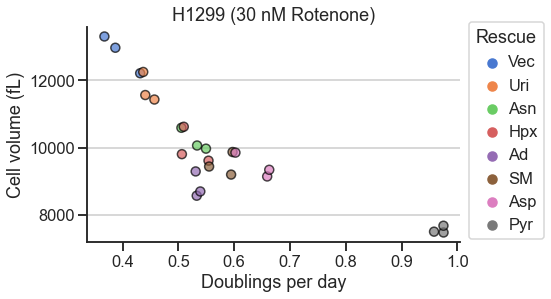

In [8]:
# Plot only normal DMEM media data:
mask = df['Media'] == 'Ser'

fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.5))

g1 = sns.scatterplot(ax=ax1, y='CellVol_mean', x='Prlfr', hue='Rescue', data=df[mask], edgecolor='black', linewidth=1.5, alpha=0.7)
g1.set_xlabel('Doublings per day');
g1.set_ylabel('Cell volume (fL)');
g1.grid(True, axis='y')
#g1.set_ylim(bottom=-0.5, top=1.5);
g1.set_title('H1299 (30 nM Rotenone)')
sns.despine()
sns.move_legend(g1, loc='upper left', bbox_to_anchor=(1, 1.06), handletextpad=0)
plt.tight_layout()
fig.savefig('DMEM_data_cell_vol.pdf', bbox_inches='tight')